####  The Problem statement:
##### The goal here is to find the chance of admission of a candidate based on his/her GRE Score (out of 340), TOEFL Score (out of 120), rating of the University (out of 5) in which he/she is trying to get admission, Strength of the SOP (out of 5), strength of the Letter Of Recommendation (out of 5), CGPA (out of 10) and the research experience (0 or 1).





In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [101]:
df = pd.read_csv("Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [102]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [107]:
df.rename(columns = {"GRE Score": "gre score","TOEFL Score": "toefl score","University Rating":"university rating","SOP":"sop","LOR":"lor","CGPA":"cgpa","Research":"research"},inplace = True)

In [108]:
df.head()

,Serial No.,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [109]:
missing_data = df.isnull()

In [110]:
for columns in df:
    print(columns)
    print(f"{missing_data[columns].value_counts()}")
    print("")

Serial No.
False    500
Name: Serial No., dtype: int64

gre score
False    485
True      15
Name: gre score, dtype: int64

toefl score
False    490
True      10
Name: toefl score, dtype: int64

university rating
False    485
True      15
Name: university rating, dtype: int64

sop
False    500
Name: sop, dtype: int64

lor
False    500
Name: lor, dtype: int64

cgpa
False    500
Name: cgpa, dtype: int64

research
False    500
Name: research, dtype: int64

Chance of Admit
False    500
Name: Chance of Admit, dtype: int64



#### We have missing values in GRE Score,TOEFL Score,University Rating columns respectively.
#### we will check the pattern of this columns for imputing missing values.

<AxesSubplot:xlabel='university rating', ylabel='Density'>

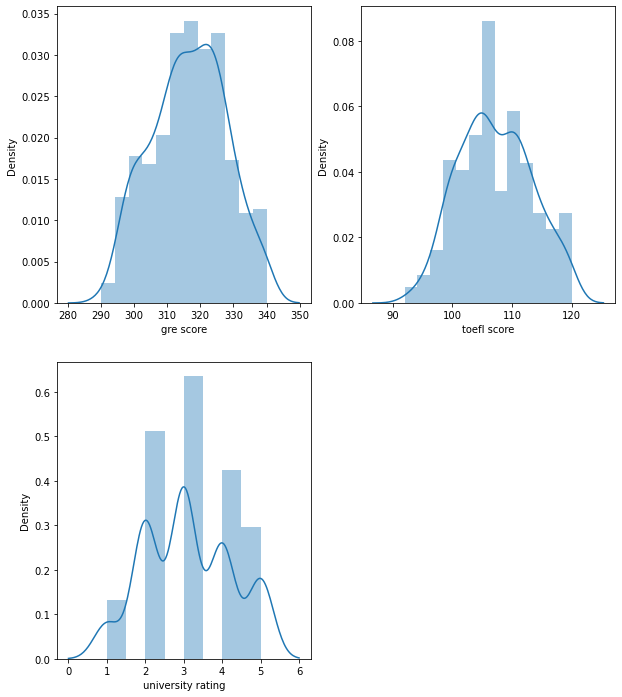

In [112]:
plt.figure(figsize = (10,12))

plt.subplot(2,2,1)
sns.distplot(df["gre score"],kde = True)

plt.subplot(2,2,2)
sns.distplot(df["toefl score"],kde = True)

plt.subplot(2,2,3)
sns.distplot(df["university rating"],kde = True)




In [117]:
df["gre score"].skew()

-0.05168658259225668

In [118]:
df["toefl score"].skew()

0.10206773213506315

In [119]:
df["university rating"].skew()

0.09105673569733876

In [120]:
df["gre score"].value_counts().idxmax()

312.0

#### We will fill our GRE Score column with the most commonly repeated value so that the distribution doesn't get disturbed.

In [121]:
df["gre score"].fillna(df["gre score"].mode()[0],inplace = True)

####  To replace the missing values in the 'TOEFL Score' column.
####  Mode has been used here to replace the scores with the most occurring scores so that data follows the general trend.


In [122]:
df["toefl score"].fillna(df["toefl score"].mode()[0],inplace = True)

####  Mean has been used here to replace the null values with the average ratings in the 'University Rating' column.



In [123]:
df["university rating"].fillna(df["university rating"].mean(),inplace = True)

In [124]:
# Now we can see that there are no missing values in the dataset.
df.isnull().sum()

Serial No.           0
gre score            0
toefl score          0
university rating    0
sop                  0
lor                  0
cgpa                 0
research             0
Chance of Admit      0
dtype: int64

In [125]:
# Dropping the features that is not important.
df.drop(["Serial No."], axis = 1,inplace = True)

#### Checking the Outliers in the Dataset:-

#### First we will check the pattern of every column to see whether its normally distributed or has a skewed distribution.

<AxesSubplot:xlabel='research', ylabel='Density'>

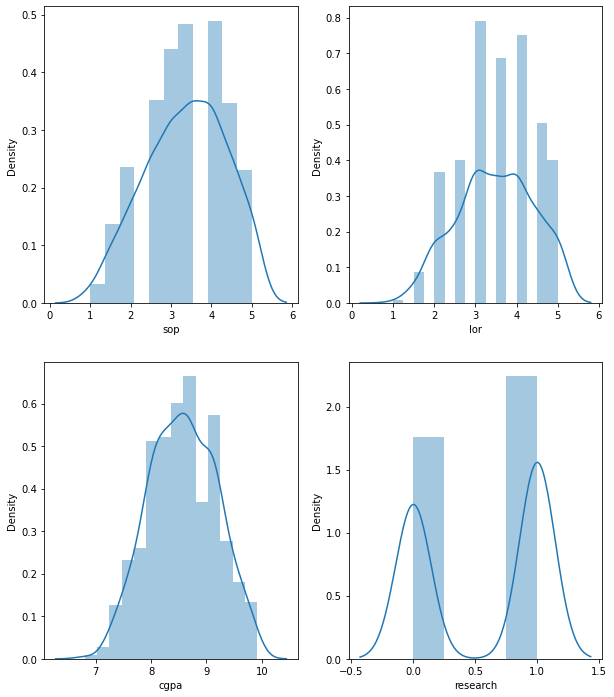

In [126]:
plt.figure(figsize = (10,12))

plt.subplot(2,2,1)
sns.distplot(df["sop"],kde = True)

plt.subplot(2,2,2)
sns.distplot(df["lor"],kde = True)

plt.subplot(2,2,3)
sns.distplot(df["cgpa"],kde = True)


plt.subplot(2,2,4)
sns.distplot(df["research"],kde = True)

In [127]:
df["sop"].skew()

-0.22897239628779945

In [128]:
df["lor"].skew()

-0.1452903146082398

In [130]:
df["cgpa"].skew()

-0.026612517318359303

In [131]:
df["research"].skew()

-0.24247492100796933

In [132]:
for columns in df:
    print(columns)
    print(f"Mean value of {columns} is {df[columns].mean()}")
    print(f"Standard Deviation of {columns} is {df[columns].std()}")
    print(f'Minimum value of {columns} is {df[columns].min()}')
    print(f'Maximum value of {columns} is {df[columns].max()}')
    print(" ")

gre score
Mean value of gre score is 316.422
Standard Deviation of gre score is 11.131204941375106
Minimum value of gre score is 290.0
Maximum value of gre score is 340.0
 
toefl score
Mean value of toefl score is 107.244
Standard Deviation of toefl score is 6.064157981455312
Minimum value of toefl score is 92.0
Maximum value of toefl score is 120.0
 
university rating
Mean value of university rating is 3.121649484536084
Standard Deviation of university rating is 1.128801908361862
Minimum value of university rating is 1.0
Maximum value of university rating is 5.0
 
sop
Mean value of sop is 3.374
Standard Deviation of sop is 0.9910036207566069
Minimum value of sop is 1.0
Maximum value of sop is 5.0
 
lor
Mean value of lor is 3.484
Standard Deviation of lor is 0.9254495738978181
Minimum value of lor is 1.0
Maximum value of lor is 5.0
 
cgpa
Mean value of cgpa is 8.576440000000003
Standard Deviation of cgpa is 0.6048128003332052
Minimum value of cgpa is 6.8
Maximum value of cgpa is 9.92
 

#### Finding the boundary values for my features as  all the features follows gaussian distribution.

In [133]:
for columns in df.iloc[:,0:7]:
    print(columns)
    print(f"Highest Value is {df[columns].mean() + 3*df[columns].std()}")
    print(f"Lowest Value is {df[columns].mean() - 3*df[columns].std()}")
    print("")
    

gre score
Highest Value is 349.81561482412536
Lowest Value is 283.0283851758747

toefl score
Highest Value is 125.43647394436593
Lowest Value is 89.05152605563407

university rating
Highest Value is 6.50805520962167
Lowest Value is -0.26475624054950186

sop
Highest Value is 6.347010862269821
Lowest Value is 0.40098913773017975

lor
Highest Value is 6.260348721693454
Lowest Value is 0.7076512783065456

cgpa
Highest Value is 10.390878400999618
Lowest Value is 6.762001599000388

research
Highest Value is 2.050652235827105
Lowest Value is -0.9306522358271048



#### Checking the Outliers in each features:-

In [134]:
df[(df["gre score"]>349.815)|(df["gre score"]<283.028)]

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit


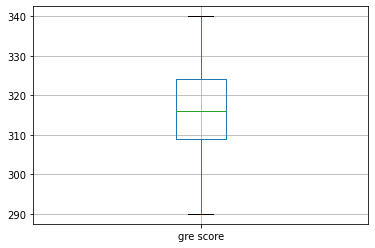

In [135]:
figure = df.boxplot(column = ["gre score"])

In [136]:
df[(df["toefl score"]>125.43)|(df["toefl score"]<89.051)]

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit


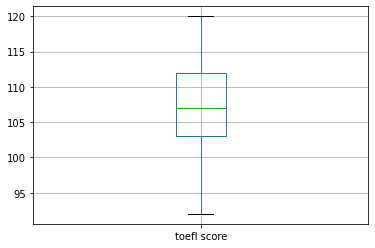

In [137]:
figure = df.boxplot(column = ["toefl score"])

In [138]:
df[(df["university rating"]>6.5080)|(df["university rating"]<-0.264)]

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit


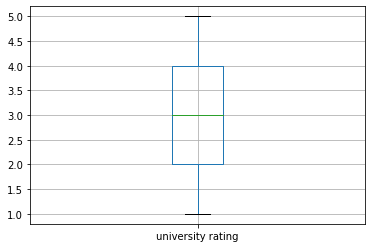

In [139]:
figure = df.boxplot(column = ["university rating"])

In [140]:
df[(df["sop"]>6.347)|(df["sop"]<0.4009)]

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit


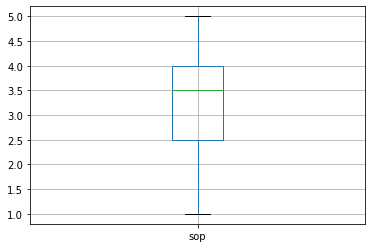

In [141]:
figure = df.boxplot(column = ["sop"])

In [142]:
df[(df["lor"]>6.260)|(df["lor"]<0.70765)]

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit


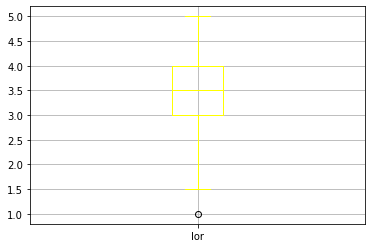

In [143]:
figure = df.boxplot(column = ["lor"],color = 'yellow')

In [144]:
df[(df["cgpa"]>10.3908)|(df["cgpa"]<6.762)]

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit


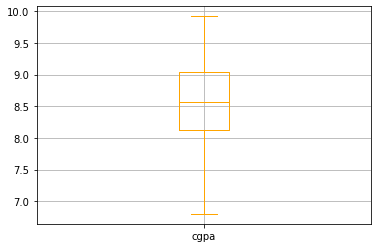

In [146]:
figure = df.boxplot(column = ["cgpa"],color = 'orange')

In [147]:
df[(df["research"]> 2.050)|(df["research"]<-0.930)]

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit


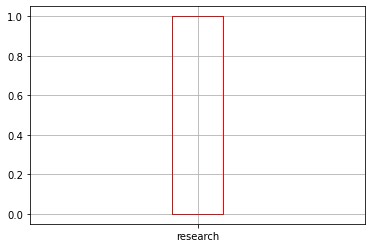

In [148]:
figure = df.boxplot(column = ["research"],color = 'red')

#### There are no outliers in our dataset.

In [149]:
df.corr()

,gre score,toefl score,university rating,sop,lor,cgpa,research,Chance of Admit
gre score,1.000000,0.813091,0.620704,0.606973,0.521241,0.816190,0.545971,0.799968
toefl score,0.813091,1.000000,0.643663,0.644384,0.538830,0.803894,0.464678,0.786873
university rating,0.620704,0.643663,1.000000,0.712991,0.606291,0.696592,0.424429,0.680716
sop,0.606973,0.644384,0.712991,1.000000,0.663707,0.712154,0.408116,0.684137
lor,0.521241,0.538830,0.606291,0.663707,1.000000,0.637469,0.372526,0.645365
cgpa,0.816190,0.803894,0.696592,0.712154,0.637469,1.000000,0.501311,0.882413
research,0.545971,0.464678,0.424429,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.799968,0.786873,0.680716,0.684137,0.645365,0.882413,0.545871,1.000000


#### Checking MultiCollinearity between feature varaiables.

<AxesSubplot:>

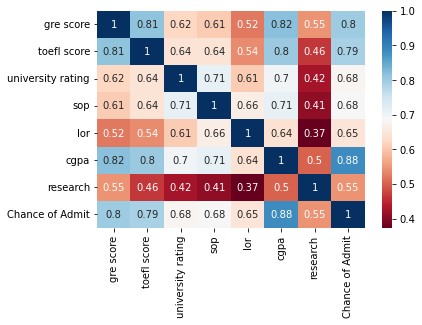

In [150]:
sns.heatmap(df.corr(),cmap ='RdBu',annot = True)

#### From the heatmap we can see that there is no  strong correlation between features, so there is no multicollinearity . 

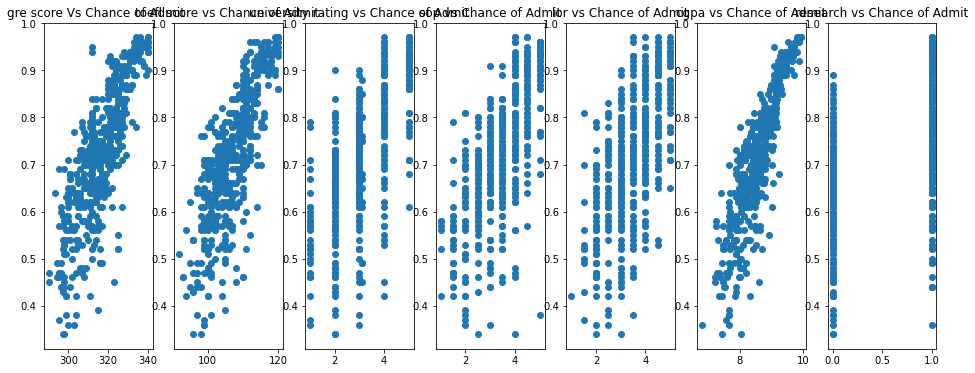

In [151]:
fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7) = plt.subplots(ncols= 7, figsize=(16,6))

ax1.scatter(df['gre score'], df['Chance of Admit'])
ax1.set_title("gre score Vs Chance of Admit ")

ax2.scatter(df['toefl score'], df['Chance of Admit'])
ax2.set_title("toefl score vs Chance of Admit ")

ax3.scatter(df['university rating'], df['Chance of Admit'])
ax3.set_title("university rating vs Chance of Admit")

ax4.scatter(df["sop"],df["Chance of Admit"])
ax4.set_title("sop vs Chance of Admit")

ax5.scatter(df["lor"],df["Chance of Admit"])
ax5.set_title("lor vs Chance of Admit")

ax6.scatter(df["cgpa"],df["Chance of Admit"])
ax6.set_title("cgpa vs Chance of Admit")

ax7.scatter(df["research"],df["Chance of Admit"])
ax7.set_title("research vs Chance of Admit")


plt.show()

####  From the above graphs between the continuous feature variables and the label column, it can be concluded that they exhibit a linear relationship amongst them. So, we’ll use Linear regression for prediction.

####  Now, we  will create separate Training and Test Data Sets .

In [152]:
# dropping the 'Chance of Admit' as they are not going to be used as features for prediction
X = df.drop(['Chance of Admit'],axis=1)
X

,gre score,toefl score,university rating,sop,lor,cgpa,research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


In [154]:
# 'Chance of Admit' is the target column which shows the probability of a candidate getting admission.
Y = df['Chance of Admit']

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
scaler.fit_transform(X)

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [157]:
print(f"The shape of X is:{X.shape}")

The shape of X is:(500, 7)


In [158]:
print(f"The shape of Y is {Y.shape}")

The shape of Y is (500,)


In [159]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,random_state = 0 ,test_size = 0.33)


In [160]:
X_train.shape

(165, 7)

In [161]:
X_test.shape

(335, 7)

In [162]:
Y_test.shape

(335,)

In [163]:
Y_train.shape

(165,)

In [164]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LassoCV

In [165]:
lr = LinearRegression()

In [166]:
lr.fit(X_train,Y_train)

LinearRegression()

In [167]:
X_test

,gre score,toefl score,university rating,sop,lor,cgpa,research
81,340.0,120.0,4.0,5.0,5.0,9.50,1
401,315.0,105.0,2.0,3.0,3.0,8.34,0
302,322.0,105.0,2.0,3.0,3.0,8.45,1
499,327.0,113.0,4.0,4.5,4.5,9.04,0
471,311.0,103.0,3.0,2.0,4.0,8.09,0
...,...,...,...,...,...,...,...
323,305.0,102.0,2.0,2.0,2.5,8.18,0
192,322.0,114.0,5.0,4.5,4.0,8.94,1
117,290.0,104.0,4.0,2.0,2.5,7.46,0
47,339.0,119.0,5.0,4.5,4.0,9.70,0


In [168]:
Y_test

81     0.96
401    0.66
302    0.65
499    0.84
471    0.64
       ... 
323    0.62
192    0.86
117    0.45
47     0.89
172    0.86
Name: Chance of Admit, Length: 335, dtype: float64

In [169]:
lr.predict([[295.0,99.0,2.0,2.5,3.0,7.65,0]])

array([0.53177763])

In [170]:
lr.coef_

array([0.00064518, 0.0040717 , 0.00043581, 0.01461567, 0.01216731,
       0.11157567, 0.0403015 ])

In [171]:
lr.intercept_

-0.9891144768192365

In [172]:
y_prediction=lr.predict(X_test)
x_prediction=lr.predict(X_train)

In [173]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [174]:
print(f"mae is {mean_absolute_error(Y_test,y_prediction)}")

mae is 0.04250214046055023


In [175]:
print(f"mse is {mean_squared_error(Y_test,y_prediction)}")

mse is 0.003633472528605158


In [176]:
print(f"r2_score of test set is {r2_score(Y_test,y_prediction)}")

r2_score of test set is 0.8243754178220322


In [177]:
r2 = lr.score(X_test,Y_test)
r2

0.8243754178220322

In [178]:
X_test.shape

(335, 7)

In [179]:
def adj_r2(X,Y):
    r2 = lr.score(X_test,Y_test)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [180]:
rid = Ridge(alpha=1.0)
rid.fit(X_train, Y_train)
Ridge()

Ridge()

In [181]:
rid.predict([[295.0,99.0,2.0,2.5,3.0,7.65,0]])

array([0.53282403])

In [182]:
Y_pred = rid.predict(X_test)

In [183]:
print(f"r2 Score of test set : {r2_score(Y_test, Y_pred)}")


r2 Score of test set : 0.8235983788260414


In [184]:
rid.coef_

array([0.00080707, 0.00425108, 0.00092994, 0.01556947, 0.01262873,
       0.10409864, 0.03896233])

In [185]:
rid.intercept_

-1.0011424235076536

In [186]:
print(f"mae is {mean_absolute_error(Y_test,Y_pred)}")

mae is 0.04267654783666333


In [187]:
print(f"mse is {mean_squared_error(Y_test,Y_pred)}")

mse is 0.003649548580206673


In [188]:
rid.score(X_test, Y_test)*100

82.35983788260414

In [189]:
lassocv = LassoCV(alphas = None,cv = 5,max_iter= 200000,normalize = True)

In [190]:
lassocv.fit(X_train,Y_train)

LassoCV(cv=5, max_iter=200000, normalize=True)

In [191]:
lassocv.alpha_

8.252252936438653e-05

In [192]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,Y_train)

Lasso(alpha=8.252252936438653e-05)

In [193]:
lasso.score(X_test,Y_test)*100

82.44797931957135

#### CONCLUSION :
#### We got a accuracy of around 83 % using Linear Regression and 81 % by other models.
####  Accuracy  is the maximum from Linear Regression Model so we will use this model.

In [194]:
import pickle

In [195]:
file = 'scaler.pkl'
pickle.dump(scaler,open(file,'wb'))

In [196]:
filename = 'Admission.Predictor_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [197]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9980983345189979


#### With the given input, our model predicts that the chance of admission is 99 per cent.Now, the model is ready for cloud deployment.


In [198]:
loaded = pickle.load(open(file,'rb'))

In [199]:
scaled = loaded.transform([[320,120,5,5,5,10,1]])

In [200]:
scaled

array([[0.32176062, 2.10561387, 1.66568791, 1.64240413, 1.63976333,
        2.35607728, 0.88640526]])